Desenfoque en un punto de interes

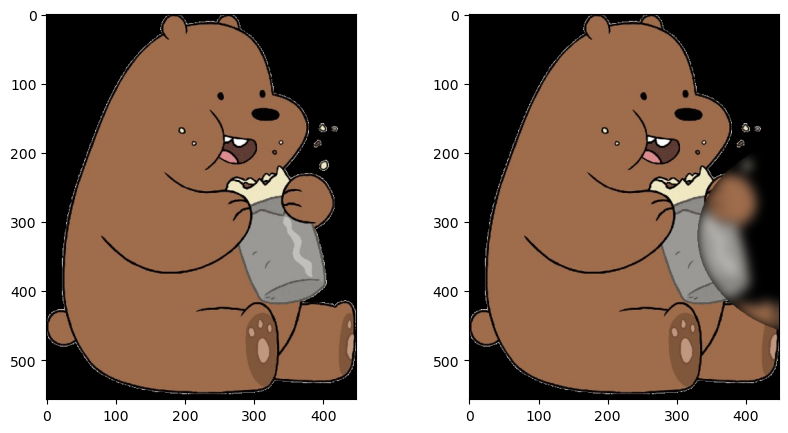

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def desenfoqueROI(img, centro, x, y):
  imgCopy = np.copy(img)
  valx,valy = centro
  mediax = x//2
  mediay = y//2
  mask =np.zeros_like(img, dtype=np.uint8)
  cv2.ellipse(mask, (valx,valy),(mediax,mediay),0,0,360,(255,255,255),-1)
  img_mask = cv2.bitwise_and(img,mask)
  desenfoque = cv2.GaussianBlur(img_mask,(49,49),0)
  imgCopy[mask!=0] = desenfoque[mask!=0]
  return imgCopy

path='../imagenes/pardoOriginal.png'
img = cv2.imread(path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_des = desenfoqueROI(img_rgb, (530,320), 400,300)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_rgb)
# plt.axis('off')
plt.subplot(122)
plt.imshow(img_des)
# plt.axis('off')

FIltros

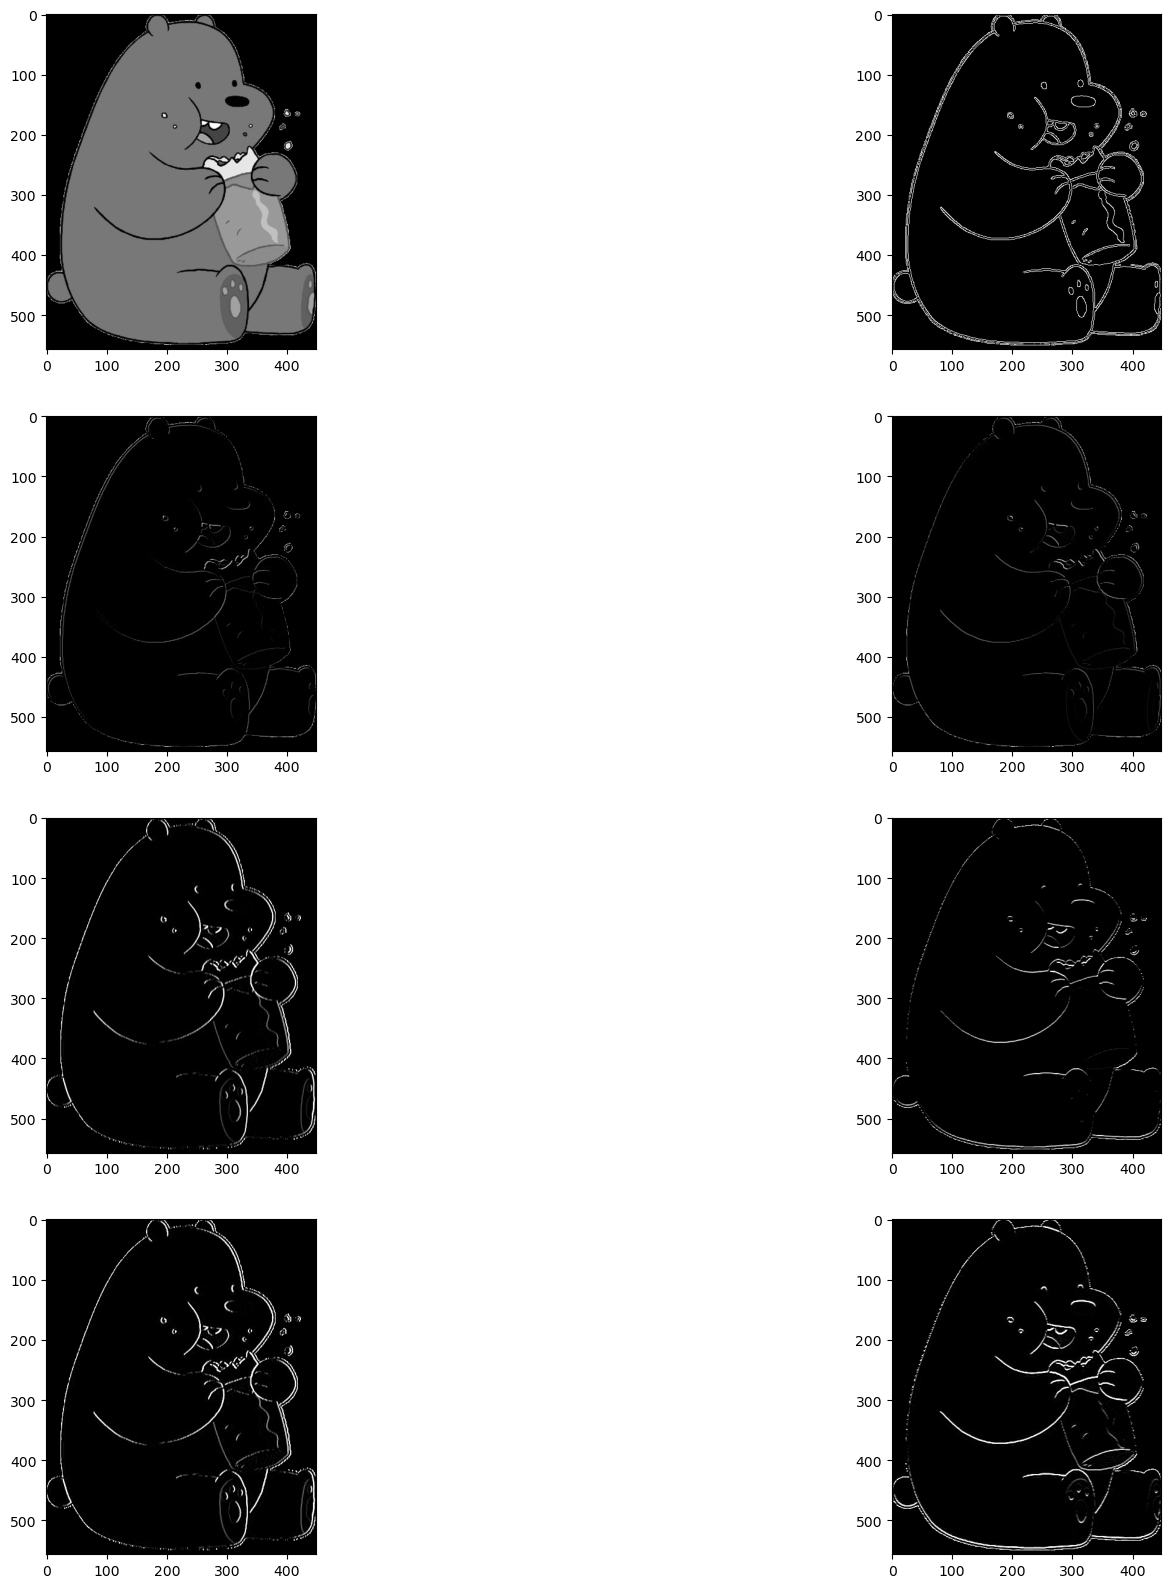

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgo1 = cv2.imread(path)
imggray = cv2.cvtColor(imgo1,cv2.COLOR_BGR2GRAY)

# filtro Roberts
# Kernel 
robertsx = np.array([[-1,0],[0,1]])
robertsy = np.array([[0,-1],[1,0]])

img_robx = cv2.filter2D(imggray, -1, robertsx)
img_roby = cv2.filter2D(imggray, -1, robertsy)

rob_gmagnitud = np.sqrt(img_robx*2+img_roby*2)
rob_gsireccion = np.arctan2(img_roby,img_robx) # Simulando aplicar un filtro prewitt

# filstro prewitt
# kernels
prewittx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
prewitty = np.array([[1,1,0],[0,0,0],[-1,-1,-1]])

img_prx = cv2.filter2D(imggray, -1, prewittx)
img_pry = cv2.filter2D(imggray, -1, prewitty)

prew_mag = np.sqrt(prewittx**2+prewitty**2)
prew_dir = np.arctan2(prewitty,prewittx)

# filtro sobel
# kernel
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

img_sobx = cv2.filter2D(imggray, -1, sobelx)
img_soby = cv2.filter2D(imggray, -1, sobely)

sob_mag = np.sqrt(sobelx**2+sobely**2)
sob_dir = np.arctan2(sobely,sobelx)

# filtro Canny
canny = cv2.Canny(imggray, 100,200)

fig,axs = plt.subplots(4,2,figsize=(20,20))

axs[0][0].imshow(imggray, cmap="gray")
axs[0][1].imshow(canny, cmap="gray")
axs[1][0].imshow(img_robx, cmap="gray")
axs[1][1].imshow(img_roby, cmap="gray")
axs[2][0].imshow(img_prx, cmap="gray")
axs[2][1].imshow(img_pry, cmap="gray")
axs[3][0].imshow(img_sobx, cmap="gray")
axs[3][1].imshow(img_soby,cmap="gray")

Rooberts

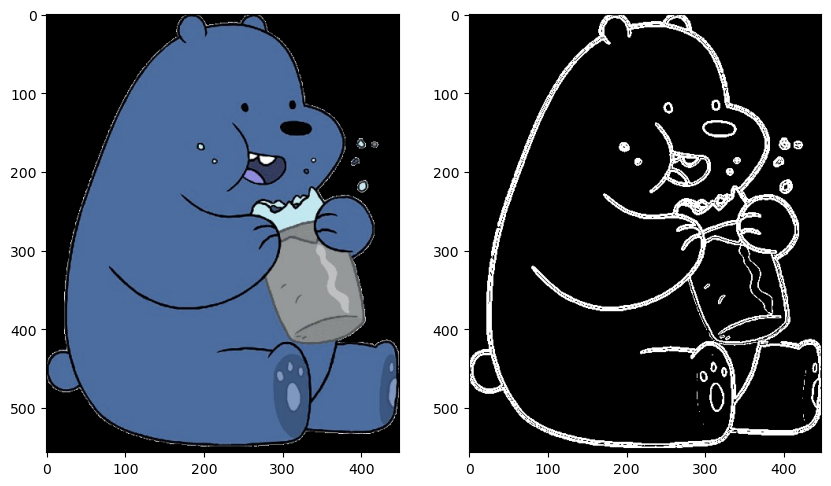

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def robberts_mejorado(imagen):
    imagen_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

    suavizado= cv2.GaussianBlur(imagen_gray,(3,3),0)
    kernelx=np.array([[-2,0],[0,2]],dtype=np.float32)
    kernely=np.array([[0,2],[-2,0]],dtype=np.float32)
    robx=cv2.filter2D(suavizado,cv2.CV_16S,kernelx) #CV_16S trabajar con 16 bits
    roby=cv2.filter2D(suavizado,cv2.CV_16S,kernely) #CV_16S trabajar con 16 bits

    roberts=cv2.addWeighted(np.abs(robx),0.7,np.abs(roby),0.7,0)
    #resaltar las los bordes

    _,borders=cv2.threshold(roberts,30,255,cv2.THRESH_BINARY)
    return borders


img= cv2.imread(path)
img_final=robberts_mejorado(img)

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_final , cmap='gray')



Sobel mejorado

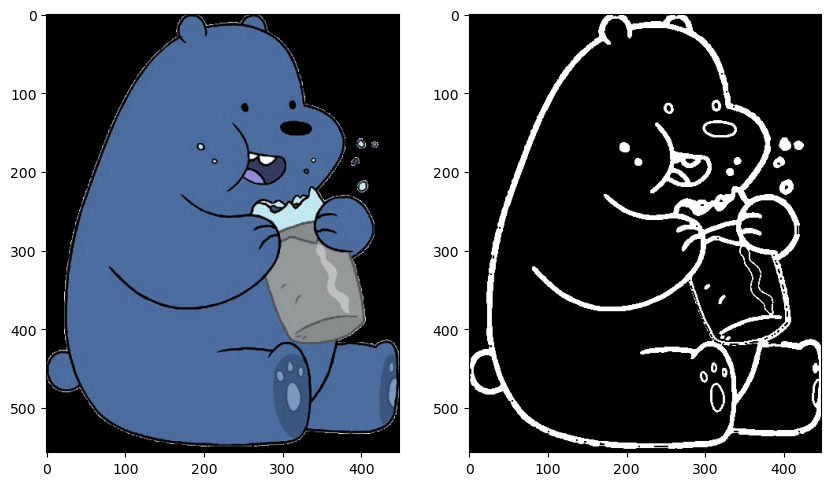

In [5]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejoardo(imagen,tam_kernel=3,umbral=30):
    img_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    img_gray=cv2.GaussianBlur(img_gray,(3,3),0)

    sobelx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=tam_kernel)
    sobely=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=tam_kernel)

    magnitud=np.sqrt(sobelx**2 + sobely**2)

    magnitud=cv2.normalize(magnitud,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
    _,border=cv2.threshold(magnitud,umbral,255,cv2.THRESH_BINARY) #agrageamos OTSU

    kernel_morf=np.ones((2,2),np.uint8)
    border=cv2.morphologyEx(border,cv2.MORPH_CLOSE,kernel_morf)
    return border

img= cv2.imread(path)
img_final=sobel_mejoardo(img)

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_final , cmap='gray')


PREWINT MEJORADO

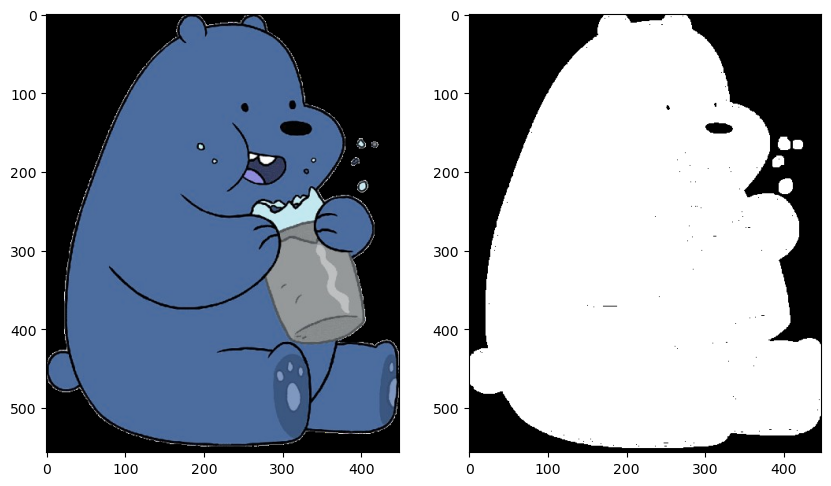

In [6]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def prewit_mejorado(imagen):
    img_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    img_gray=cv2.GaussianBlur(img_gray,(3,3),0)

    prewittx=np.array([[3,0,-3],[3,0,-3],[3,0,-3]],dtype=np.float32)
    prewitty=np.array([[3,0,3],[0,0,0],[-3,-3,-3]],dtype=np.float32)

    x=cv2.filter2D(img_gray,cv2.CV_64F,prewittx)
    y=cv2.filter2D(img_gray,cv2.CV_64F,prewitty)

    margitud= np.sqrt(x**2+y**2)
    _,border=cv2.threshold(margitud,30,255,cv2.THRESH_BINARY)
    return border

img= cv2.imread(path)
img_final=prewit_mejorado(img)

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_final , cmap='gray')




Fuccion ROberts feo

In [7]:
# filtro Roberts
# Kernel 
def Roberts_feo(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    robertsx = np.array([[-1,0],[0,1]])
    robertsy = np.array([[0,-1],[1,0]])
    
    img_robx = cv2.filter2D(img_gray, -1, robertsx)
    img_roby = cv2.filter2D(img_gray, -1, robertsy)
    
    rob_gmagnitud = np.sqrt(img_robx**2+img_roby**2)
    return (img_robx,img_roby,rob_gmagnitud)


Funcion sobel

In [8]:
def Sobel(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

    img_sobx = cv2.filter2D(img_gray, -1, sobelx)
    img_soby = cv2.filter2D(img_gray, -1, sobely)

    sob_mag = np.sqrt(img_sobx**2+img_soby**2)
    return (img_sobx,img_soby,sob_mag)

Funcion Prewitt

In [9]:
def Prewitt(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    prewittx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    prewitty = np.array([[1,1,0],[0,0,0],[-1,-1,-1]])

    img_prx = cv2.filter2D(img_gray, -1, prewittx)
    img_pry = cv2.filter2D(img_gray, -1, prewitty)

    prew_mag = np.sqrt(img_prx**2+img_pry**2)
    return (img_prx,img_pry,prew_mag)


Comparacion

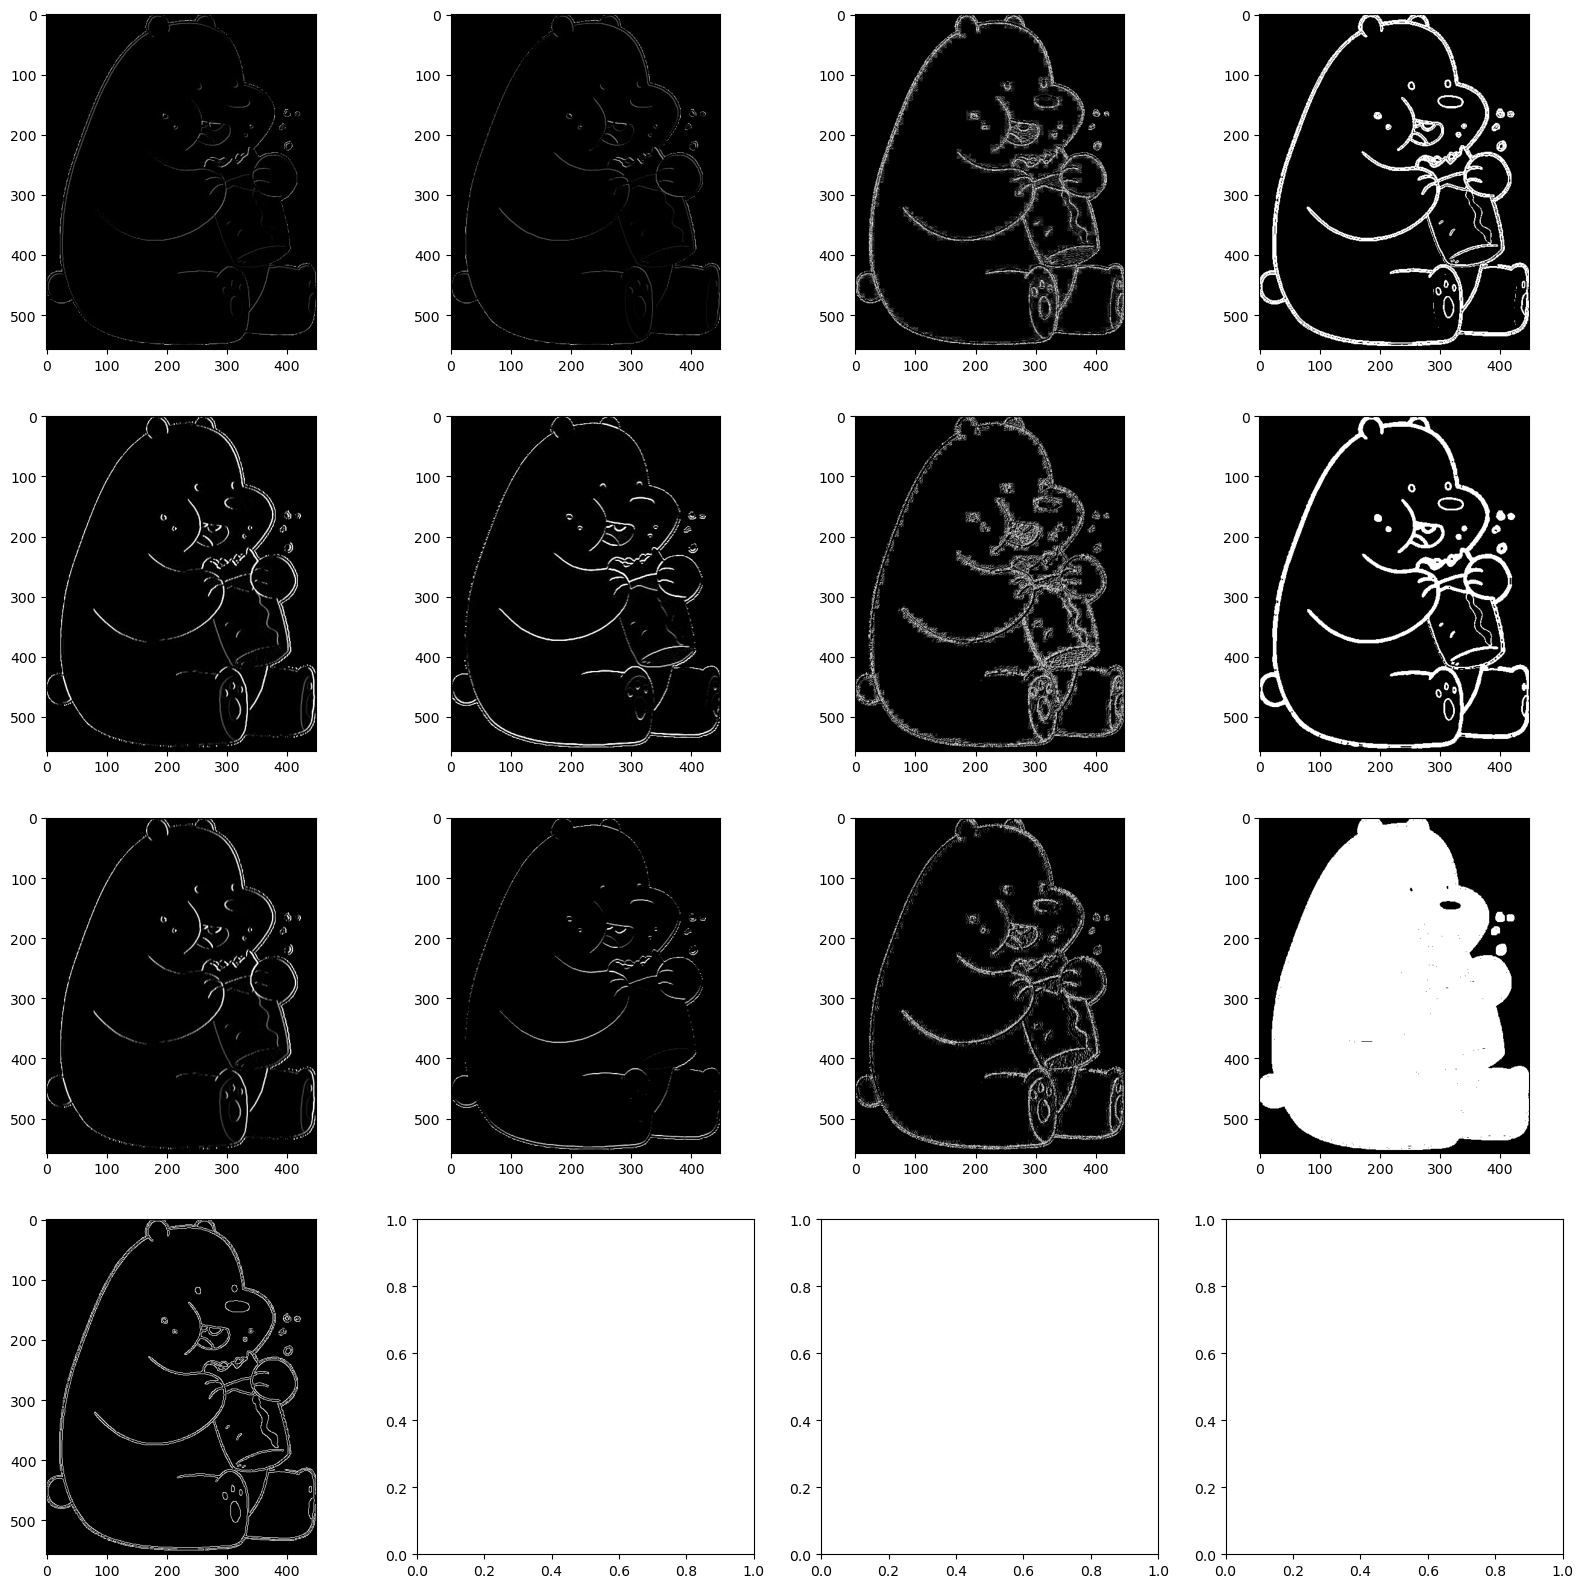

In [10]:
imagen=cv2.imread(path)

fig,axs = plt.subplots(4,4,figsize=(20,20))
r1,r2,r3=Roberts_feo(imagen)
img_roberts_mejorado=robberts_mejorado(imagen)

s1,s2,s3=Sobel(imagen)
img_sobel_mejorado=sobel_mejoardo(imagen)

p1,p2,p3=Prewitt(imagen)
img_prewytt_mejorado=prewit_mejorado(imagen)

canny = cv2.Canny(imagen, 100,200)
    

axs[0][0].imshow(r1,cmap='gray')
axs[0][1].imshow(r2,cmap='gray')
axs[0][2].imshow(r3,cmap='gray')
axs[0][3].imshow(img_roberts_mejorado,cmap='gray')

axs[1][0].imshow(s1,cmap='gray')
axs[1][1].imshow(s2,cmap='gray')
axs[1][2].imshow(s3,cmap='gray')
axs[1][3].imshow(img_sobel_mejorado,cmap='gray')

axs[2][0].imshow(p1,cmap='gray')
axs[2][1].imshow(p2,cmap='gray')
axs[2][2].imshow(p3,cmap='gray')
axs[2][3].imshow(img_prewytt_mejorado,cmap='gray')

axs[3][0].imshow(canny,cmap='gray')




